In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata

In [3]:
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

In [4]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_othIm.csv"

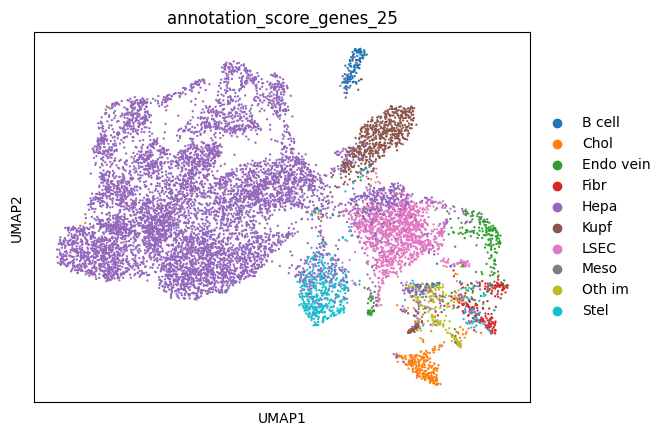

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_score_genes_25
B cell                      1.371571
Chol                        2.404703
Endo vein                   1.986106
Fibr                        1.745636
Hepa                       69.825436
Kupf                        5.700036
LSEC                       10.705379
Meso                        0.106876
Oth im                      1.656573
Stel                        4.497684


In [5]:
# Original score_genes with basic marker gene list
mg_dict, scoresper_cluster = score_genes_bins(
    sdata = sdata,
    path_marker_genes = path_mg,
    bins = 25)
visualize_classification(sdata,'annotation_score_genes_25','umap_23_15',path_mg,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

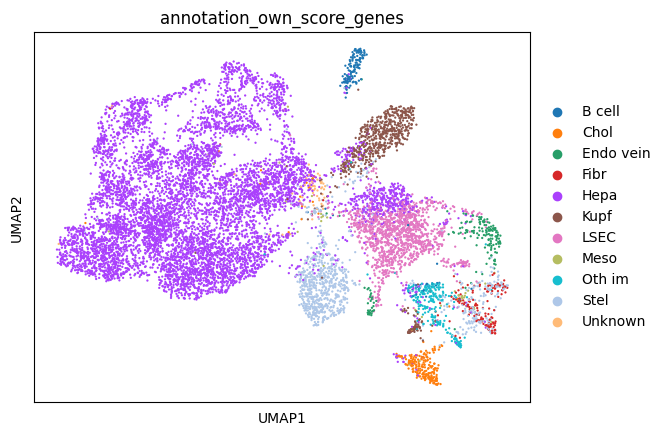

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       1.522978
Chol                         2.110794
Endo vein                    1.549697
Fibr                         1.309227
Hepa                        65.879943
Kupf                         5.735661
LSEC                        11.311008
Meso                         0.400784
Oth im                       2.084076
Stel                         7.579266
Unknown                      0.516566


Hepa      LSEC  Endo vein      Chol      Kupf      Stel      Fibr  \
0      0.538750       NaN   0.021096  0.085765  0.021767       NaN  0.020318   
1           NaN  0.055902        NaN       NaN  0.376261       NaN  0.241621   
2           NaN       NaN        NaN       NaN  0.019384       NaN  0.274330   
3      0.199726       NaN        NaN  0.036456       NaN       NaN  0.154209   
4      0.234711       NaN        NaN  0.069145       NaN  0.056901  0.022204   
...         ...       ...        ...       ...       ...       ...       ...   
11223  0.313497       NaN        NaN  0.059235       NaN  0.061714  0.020161   
11224  0.511616       NaN        NaN  0.081015  0.051679  0.072720  0.028773   
11225  0.354052       NaN        NaN  0.058203  0.049886       NaN       NaN   
11226       NaN       NaN        NaN       NaN  0.063038  0.602880  0.242782   
11227  0.250237  0.194107   0.069639  0.058369  0.628397       NaN  0.021293   

       B cell      Meso    Oth im  
0         NaN       NaN  0.038485  
1         NaN  0.526007       NaN  
2         NaN  0.717227       NaN  
3         NaN  0.229382       NaN  
4         NaN       NaN       NaN  
...       ...       ...       ...  
11223     NaN       NaN       NaN  
11224     NaN       NaN       NaN  
11225     NaN       NaN       NaN  
11226     NaN       NaN       NaN  
11227     NaN       NaN  0.032582  

[11228 rows x 10 columns]

In [6]:
# Own score genes with basic marker gene list and just MinMax scaling
scores = own_score_genes(sdata.table,path_mg)
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',path_mg,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
scores

Hepa         0.658799
LSEC         0.113110
Stel         0.075793
Kupf         0.057357
Chol         0.021108
Oth im       0.020841
Endo vein    0.015497
B cell       0.015230
Fibr         0.013092
Unknown      0.005166
Meso         0.004008
Name: annotation_own_score_genes, dtype: float64


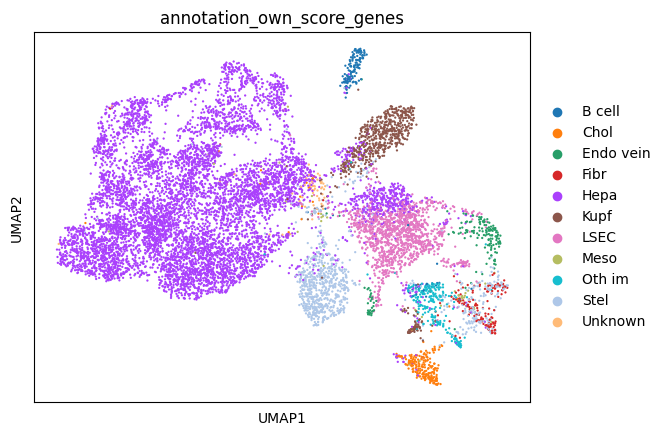

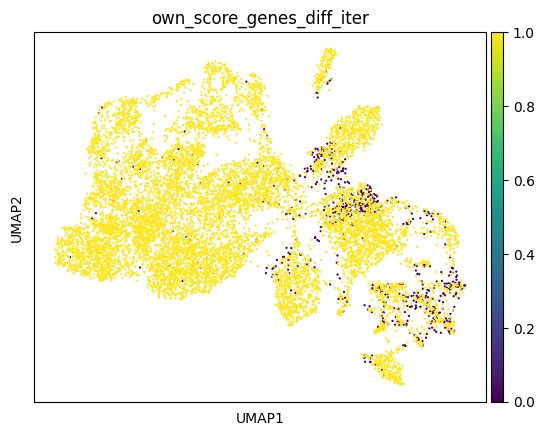

0.06572853580334877


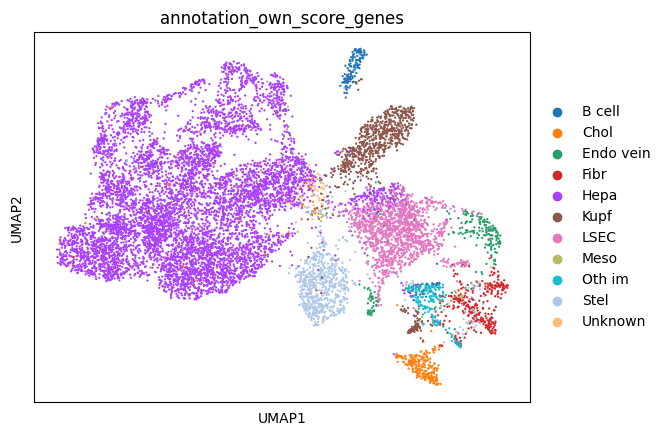

Hepa         0.623887
LSEC         0.126470
Kupf         0.071250
Stel         0.064304
Fibr         0.029569
Chol         0.024849
Endo vein    0.018881
Oth im       0.017456
B cell       0.016031
Unknown      0.005166
Meso         0.002138
Name: annotation_own_score_genes, dtype: float64


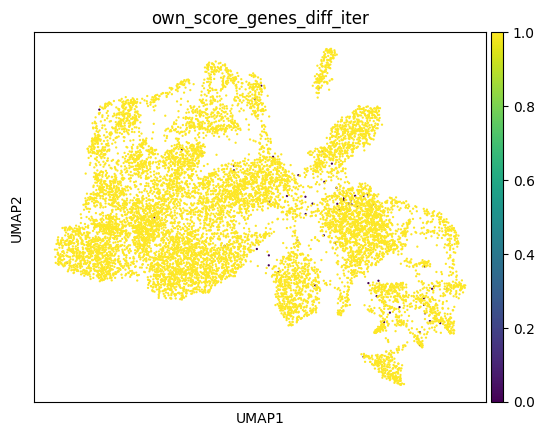

0.005789098681866761


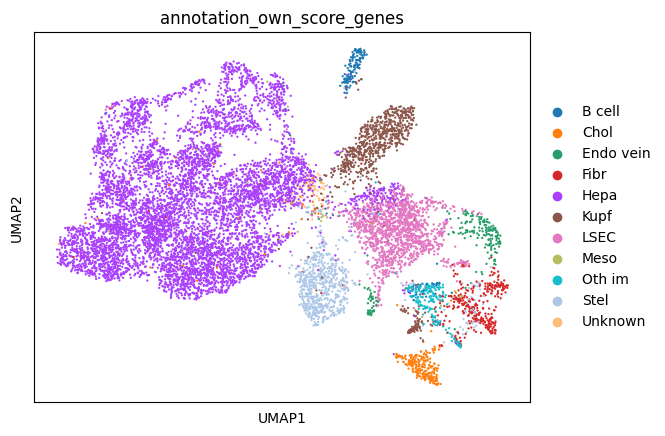

Hepa         0.620502
LSEC         0.128340
Kupf         0.072408
Stel         0.062968
Fibr         0.031083
Chol         0.024938
Endo vein    0.018970
Oth im       0.017545
B cell       0.015942
Unknown      0.005166
Meso         0.002138
Name: annotation_own_score_genes, dtype: float64


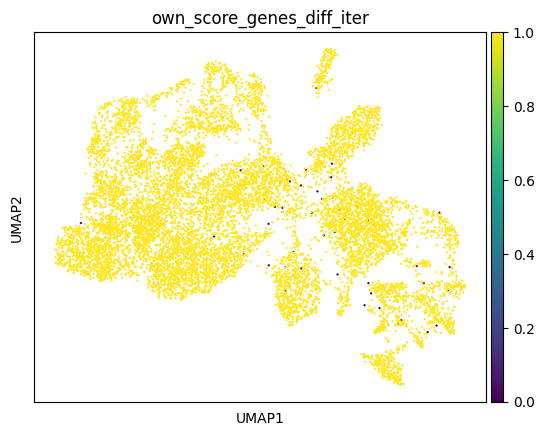

0.004453152832205202


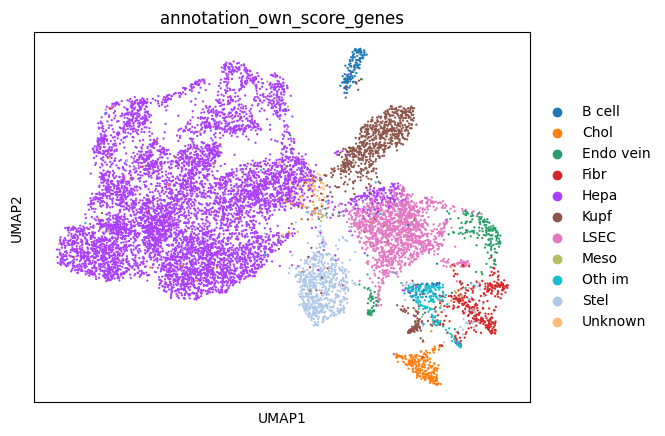

Hepa         0.620146
LSEC         0.126915
Kupf         0.074902
Stel         0.061275
Fibr         0.031528
Chol         0.024492
Endo vein    0.019238
Oth im       0.017991
B cell       0.016209
Unknown      0.005166
Meso         0.002138
Name: annotation_own_score_genes, dtype: float64


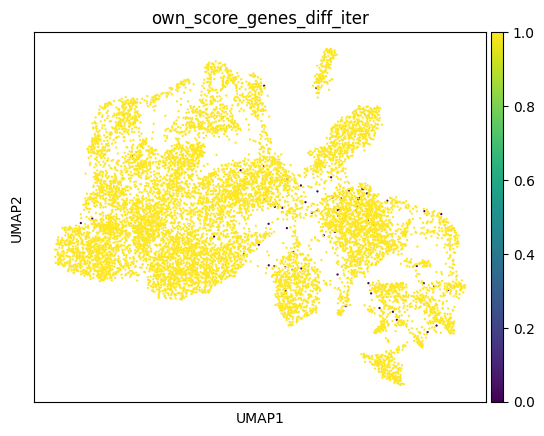

0.005878161738510866


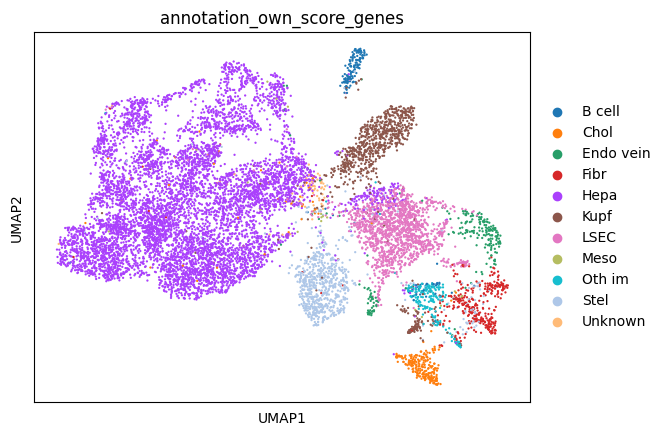

Hepa         0.618365
LSEC         0.128607
Kupf         0.073299
Stel         0.063413
Fibr         0.030994
Chol         0.024760
Endo vein    0.020039
Oth im       0.017278
B cell       0.015942
Unknown      0.005166
Meso         0.002138
Name: annotation_own_score_genes, dtype: float64


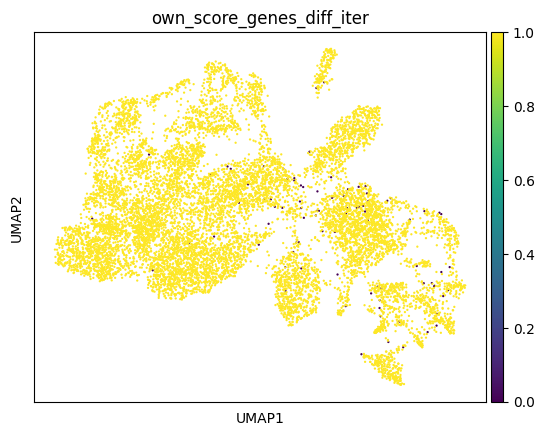

0.008460990381189882


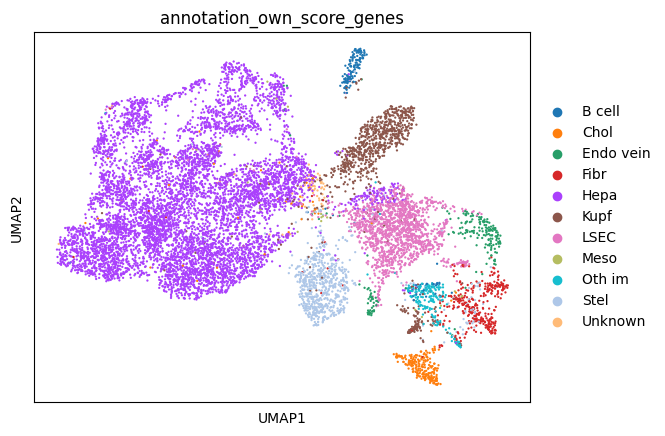

Hepa         0.615069
LSEC         0.130032
Kupf         0.077485
Stel         0.061543
Fibr         0.032419
Chol         0.024670
Endo vein    0.018792
Oth im       0.017011
B cell       0.015675
Unknown      0.005166
Meso         0.002138
Name: annotation_own_score_genes, dtype: float64


[0.06572853580334877,
 0.005789098681866761,
 0.004453152832205202,
 0.005878161738510866,
 0.008460990381189882]

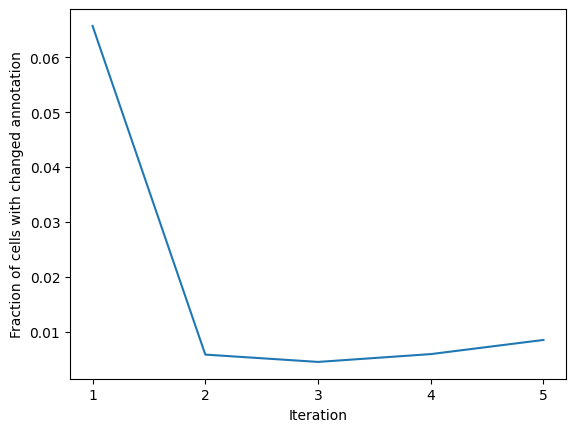

In [7]:
# Own score genes with basic marker gene list and iterative
own_score_genes_iterative(sdata.table,path_mg,nr_iterations=5)

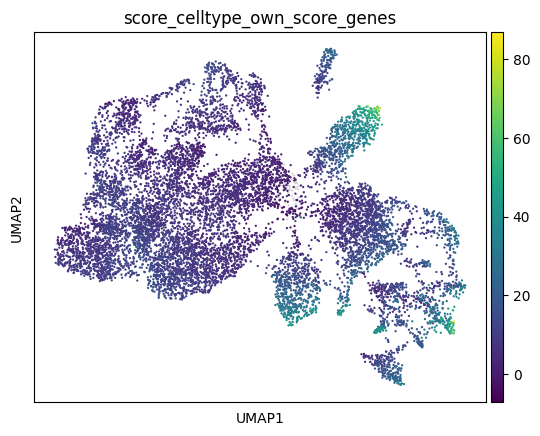

In [8]:
sc.pl.umap(sdata.table,color=['score_celltype_own_score_genes'])

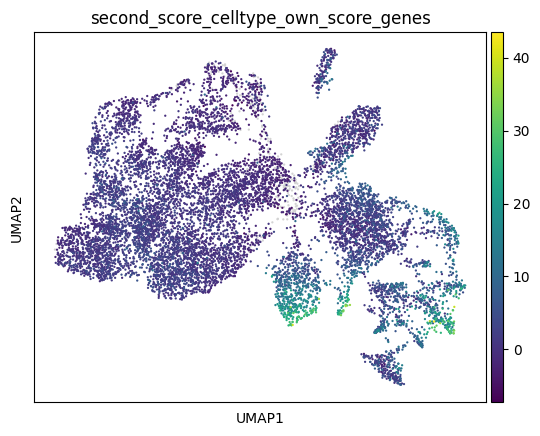

In [9]:
sc.pl.umap(sdata.table,color=['second_score_celltype_own_score_genes'])

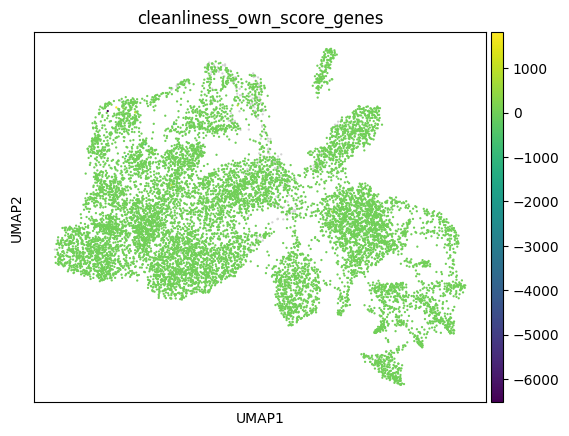

In [10]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes'])

Hepa         10
LSEC         11
Endo vein     9
Chol          7
Kupf         16
Stel         16
Fibr         21
B cell        4
Meso          5
Oth im        4
dtype: int64


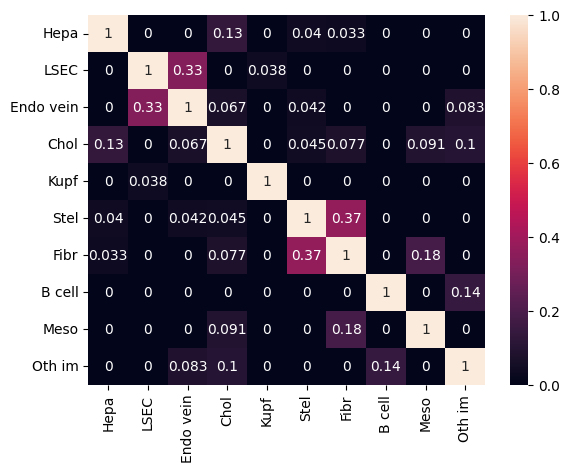

In [11]:
Jaccard_similarity_matrix(path_mg)

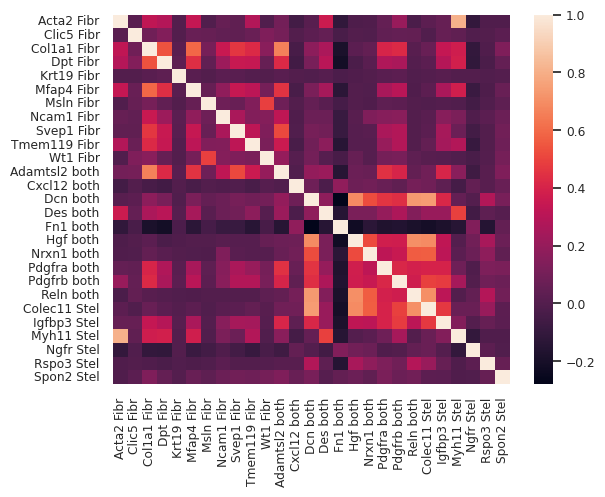

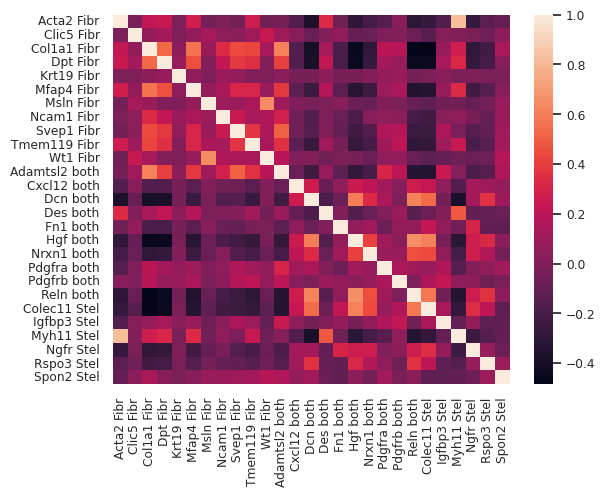

In [12]:
# plot correlation matrix of the gene expression of the marker genes of 2 confused cell types
# confusion between fibroblasts and stellate cells
# expression of all cells
sns.set(font_scale=0.8)
correlation_matrix_expression_marker_genes_of_2_cell_types(sdata.table,path_mg,'Fibr','Stel')
plt.show()
# expression of cells that are classified as fibroblasts or stellate cells
adata_sub = sdata.table[(sdata.table.obs['annotation_own_score_genes'] == 'Fibr') | (sdata.table.obs['annotation_own_score_genes'] == 'Stel'),:]
correlation_matrix_expression_marker_genes_of_2_cell_types(adata_sub,path_mg,'Fibr','Stel')

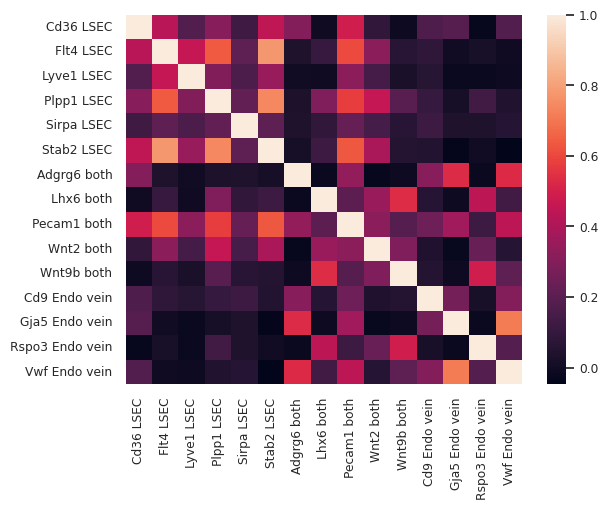

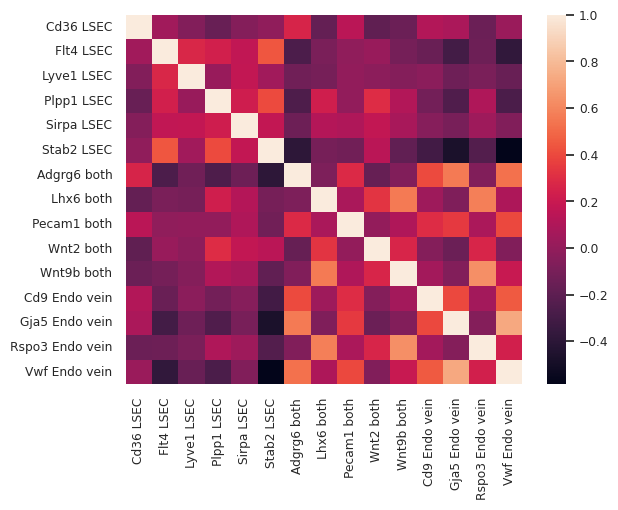

In [13]:
# plot correlation matrix of the gene expression of the marker genes of 2 confused cell types
# confusion between LSECs and Endo vein cells
# expression of all cells
correlation_matrix_expression_marker_genes_of_2_cell_types(sdata.table,path_mg,'LSEC','Endo vein')
plt.show()
# expression of cells that are classified as fibroblasts or stellate cells
adata_sub = sdata.table[(sdata.table.obs['annotation_own_score_genes'] == 'LSEC') | (sdata.table.obs['annotation_own_score_genes'] == 'Endo vein'),:]
correlation_matrix_expression_marker_genes_of_2_cell_types(adata_sub,path_mg,'LSEC','Endo vein')

<AxesSubplot: >

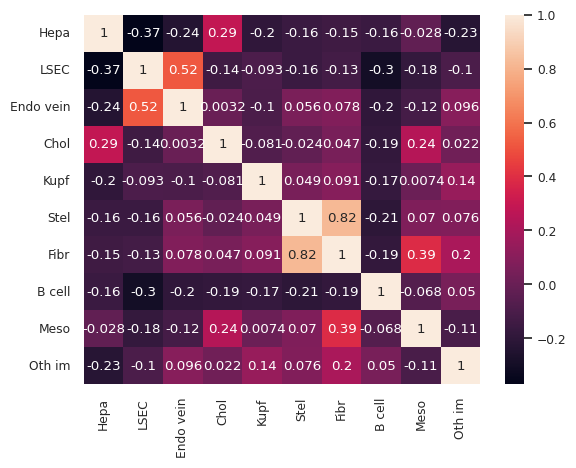

In [14]:
# plot correlation matrix of the features
sns.heatmap(scores.corr(method='pearson'), annot=True)
# sns.heatmap(scores_minmax.corr(method='pearson'), annot=True) gives the same heatmap

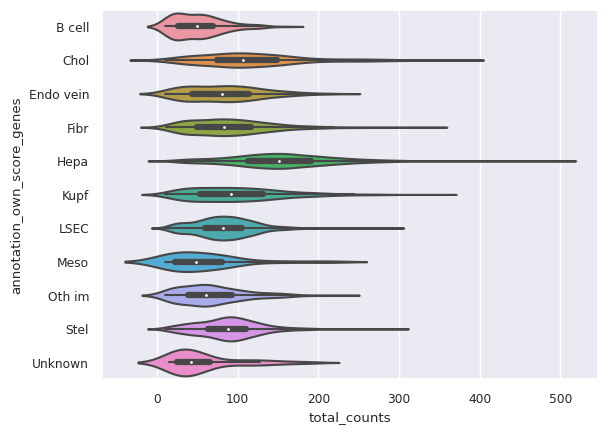

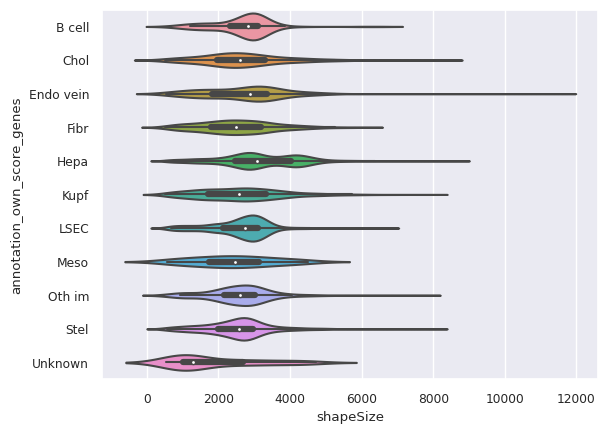

<AxesSubplot: xlabel='count_density', ylabel='annotation_own_score_genes'>

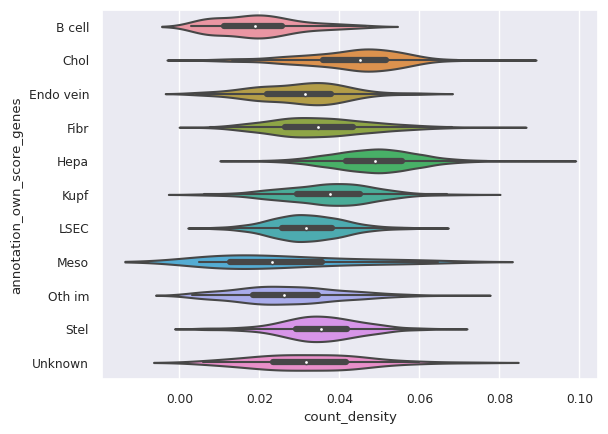

In [15]:
sns.violinplot(data=sdata.table.obs,x="total_counts",y="annotation_own_score_genes")
plt.show()
sns.violinplot(data=sdata.table.obs,x="shapeSize",y="annotation_own_score_genes")
plt.show()
sdata.table.obs['count_density'] = sdata.table.obs['total_counts'] / sdata.table.obs['shapeSize']
sns.violinplot(data=sdata.table.obs,x="count_density",y="annotation_own_score_genes")

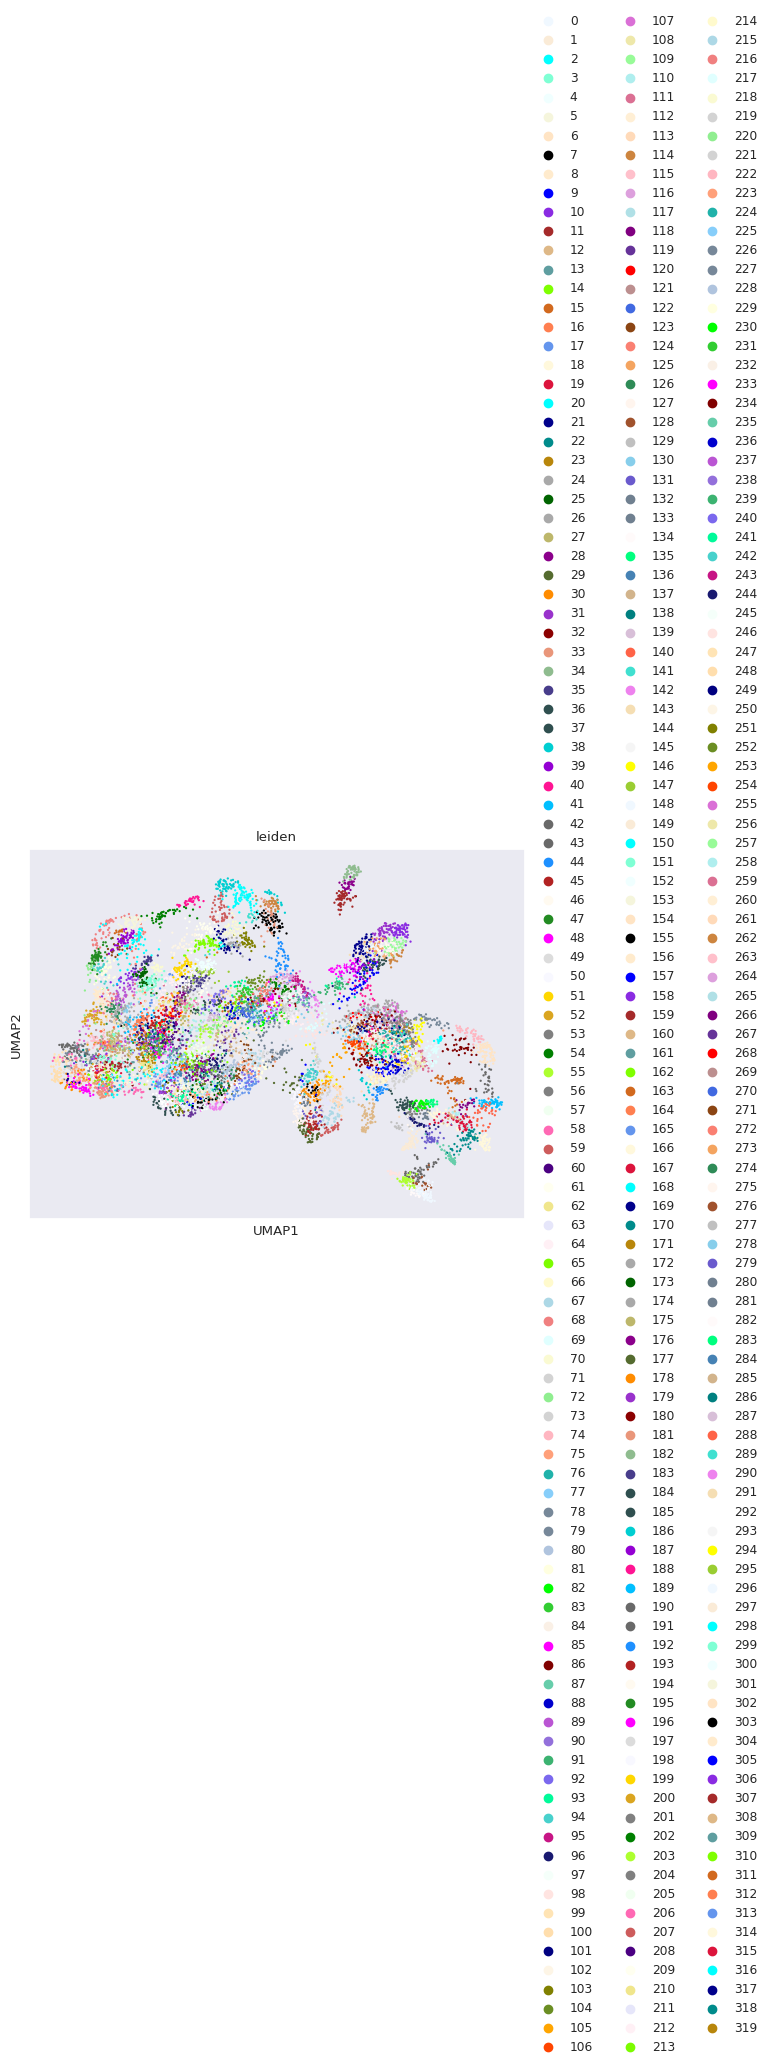

In [16]:
sc.tl.leiden(sdata.table,resolution=30,key_added='leiden')
sc.pl.umap(sdata.table,color='leiden',palette=list(matplotlib.colors.CSS4_COLORS.values()))

Index(['B cell', 'Chol', 'Endo vein', 'Fibr', 'Hepa', 'Kupf', 'LSEC', 'Meso',
       'Oth im', 'Stel', 'Unknown'],
      dtype='object')
Hepa
[2, 3, 4, 5, 7, 8, 13, 14, 16, 17, 20, 23, 24, 25, 26, 27, 28, 33, 35, 38, 39, 42, 44, 47, 49, 51, 52, 54, 57, 58, 59, 60, 61, 62, 64, 65, 68, 70, 72, 73, 75, 77, 78, 80, 81, 83, 84, 85, 89, 90, 92, 93, 95, 96, 97, 99, 100, 101, 102, 103, 104, 110, 112, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 126, 132, 133, 134, 136, 137, 138, 139, 142, 143, 144, 145, 147, 149, 150, 151, 152, 153, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 170, 171, 172, 173, 174, 175, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 193, 195, 196, 197, 200, 202, 203, 204, 205, 206, 208, 209, 210, 212, 213, 214, 215, 216, 218, 220, 222, 223, 224, 225, 226, 227, 229, 230, 231, 232, 233, 235, 236, 237, 238, 239, 240, 242, 243, 245, 248, 249, 251, 252, 253, 254, 255, 257, 259, 263, 265, 267, 268, 269, 270, 271, 272, 273, 274, 277, 278, 284, 288,

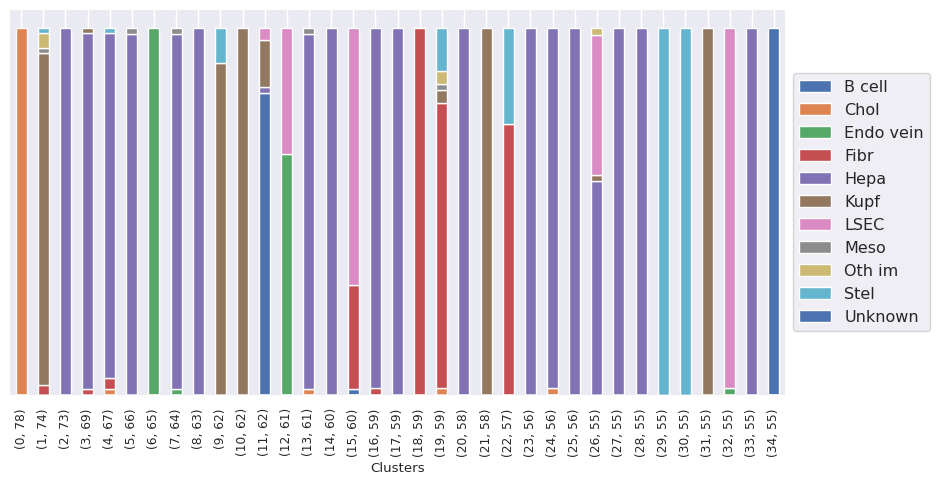

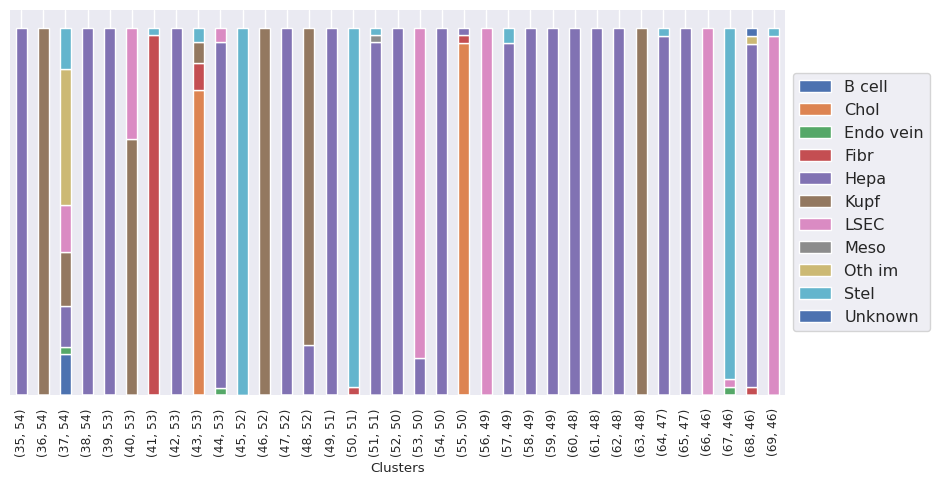

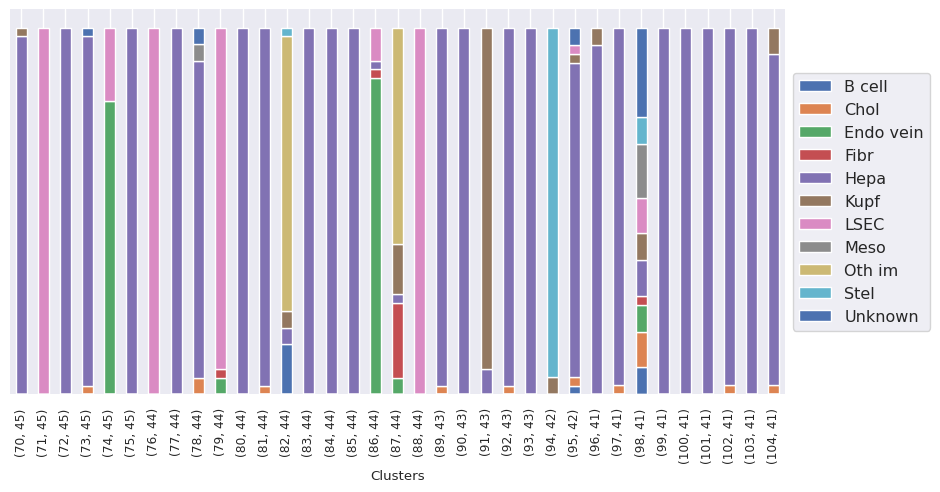

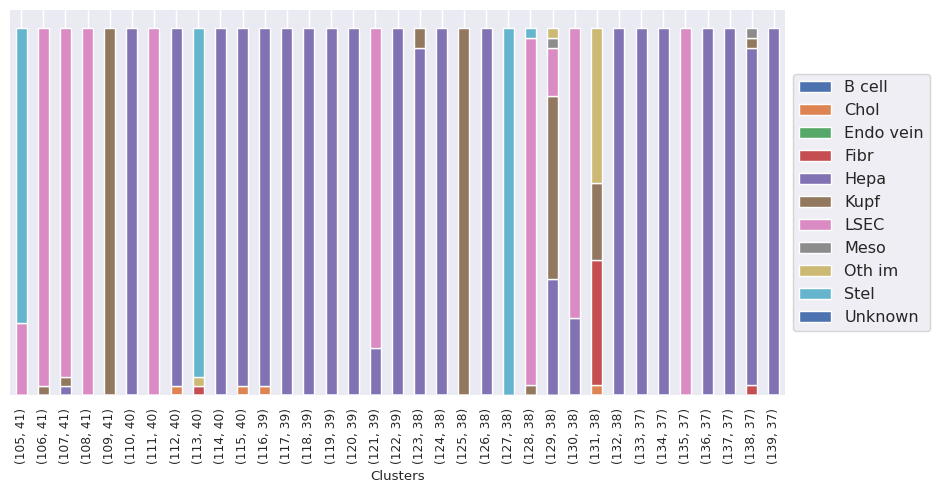

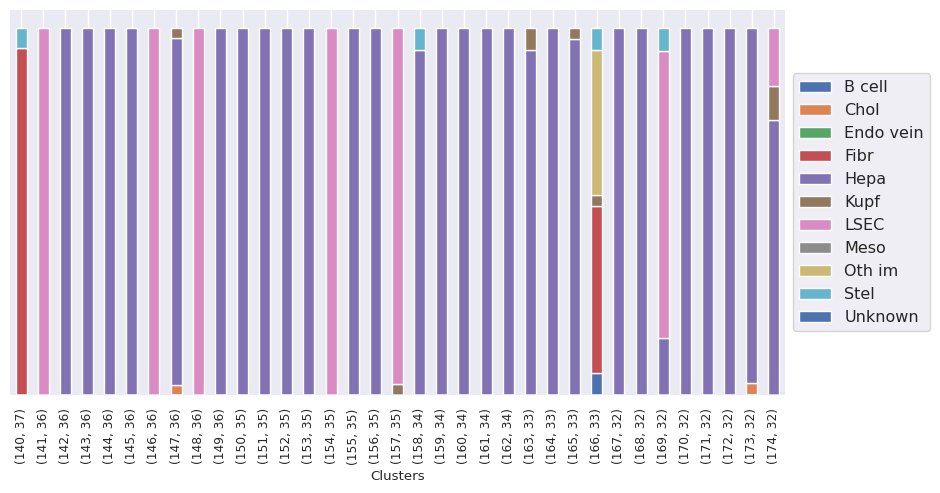

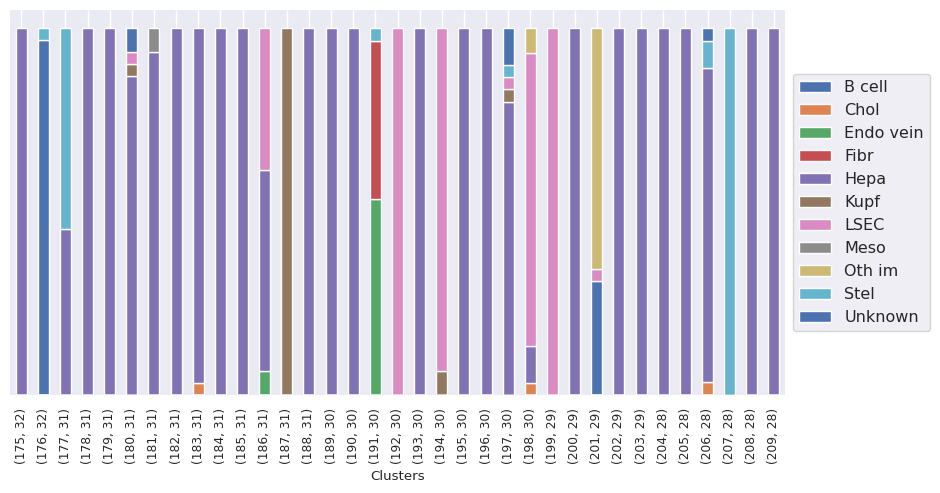

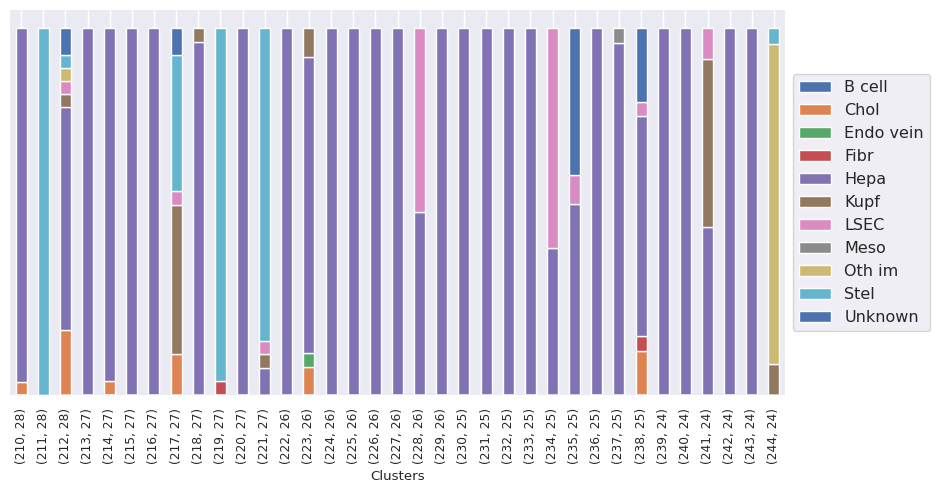

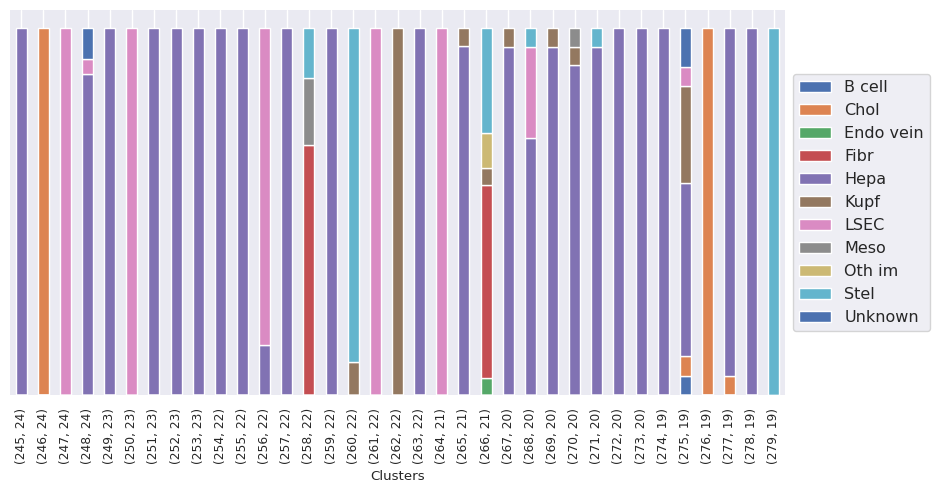

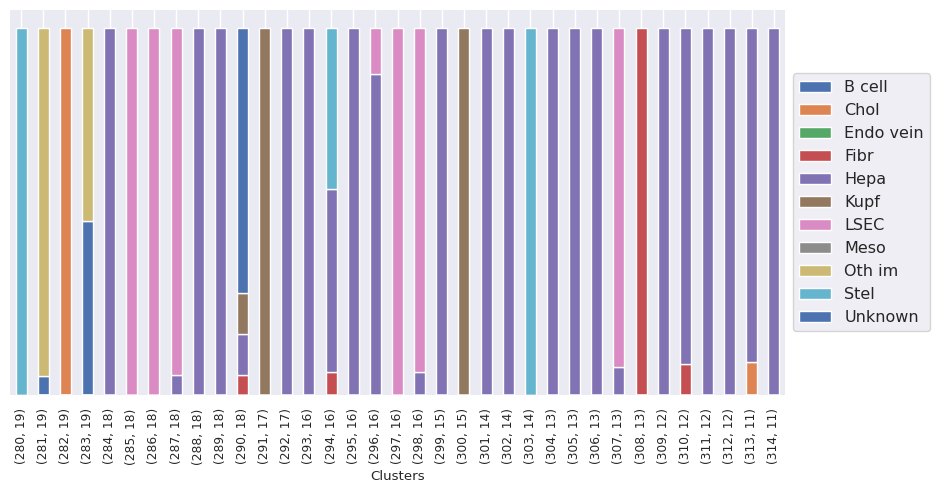

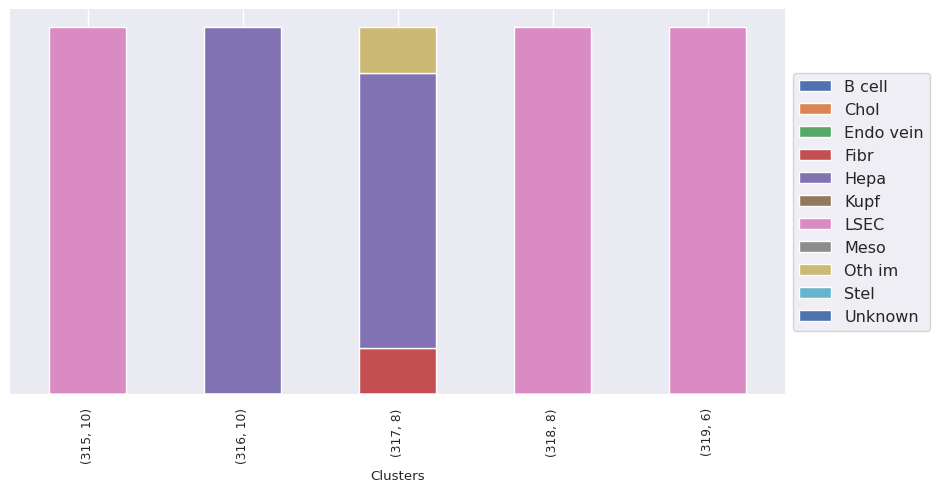

In [17]:
cell_types = ['Hepa','Kupf','LSEC','Endo vein','Fibr','Stel','Meso','Chol','B cell','Oth im','Unknown']
leiden_clusters_per_ct = clusteringVSleiden(sdata.table, "annotation_own_score_genes", "leiden",cell_types)

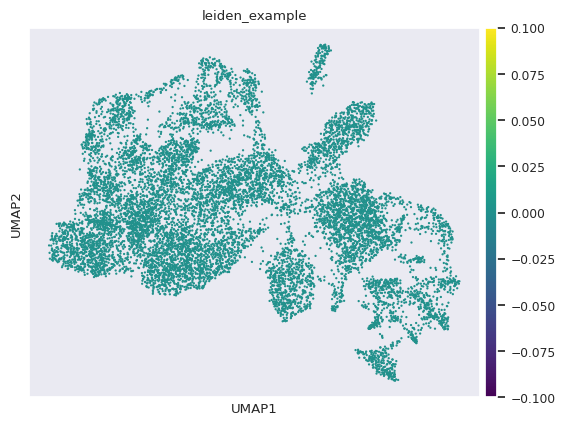

In [18]:
# Meso
sdata.table.obs['leiden_example'] = sdata.table.obs['leiden'].isin([str(x) for x in leiden_clusters_per_ct[6]]).astype(int)
sc.pl.umap(sdata.table,color=['leiden_example'],color_map='viridis')

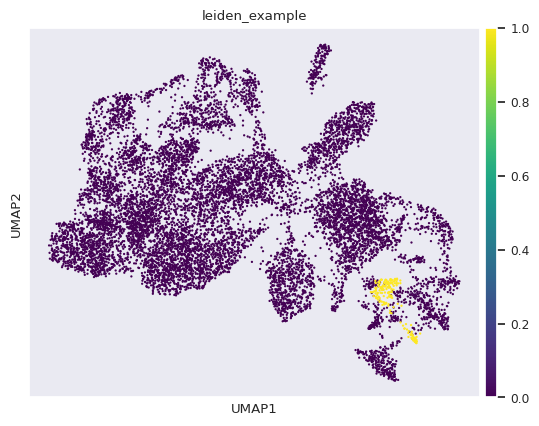

In [19]:
# Oth im
sdata.table.obs['leiden_example'] = sdata.table.obs['leiden'].isin([str(x) for x in leiden_clusters_per_ct[9]]).astype(int)
sc.pl.umap(sdata.table,color=['leiden_example'],color_map='viridis')

In [20]:
a = sdata.table.obs['leiden']
i = 0
for putative_leiden_clusters in leiden_clusters_per_ct:
    L = [str(x) for x in putative_leiden_clusters]
    for n in L:
        a = a.replace(n,cell_types[i])
    i += 1
sdata.table.obs['leiden_cell_types'] = a
# cells per leiden_cell_type cluster, to see the max number of n_cells you can take per cluster (149 in this case)
print(sdata.table.obs['leiden_cell_types'].value_counts())
min_cells_per_leiden_cell_type = sdata.table.obs['leiden_cell_types'].value_counts().min()
print(min_cells_per_leiden_cell_type)

Hepa         6958
LSEC         1387
Kupf          777
Stel          635
Unknown       334
Fibr          321
Endo vein     245
Chol          243
Oth im        179
B cell        149
Name: leiden_cell_types, dtype: int64
149


In [21]:
# STRATEGY 1 to change the marker gene list
results_strat1_10, results_runs1_10, DEG_details_runs1_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters_per_ct,path_mg,10,min_cells_per_leiden_cell_type,1)

ValueError: Sample larger than population or is negative

In [ ]:
# Update marker gene list based on STRATEGY 1:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_othIm_modified1.csv")

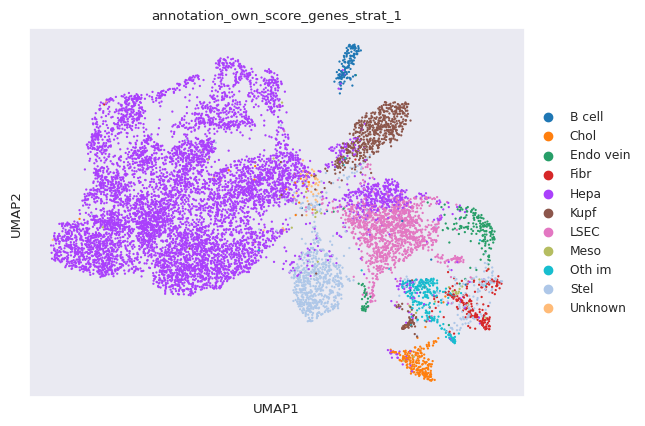

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_1
B cell                               1.416103
Chol                                 2.092982
Endo vein                            1.710011
Fibr                                 1.718917
Hepa                                66.129320
Kupf                                 5.726755
LSEC                                10.999287
Meso                                 0.400784
Oth im                               2.235483
Stel                                 7.205201
Unknown                              0.365159


In [ ]:
# Own score genes with modified marker gene list based on STRATREGY 1
path_mg_mod1 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_othIm_modified1.csv"
scores = own_score_genes(sdata.table,path_mg_mod1,suffix='_strat_1')
visualize_classification(sdata,'annotation_own_score_genes_strat_1','umap_23_15',path_mg_mod1,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

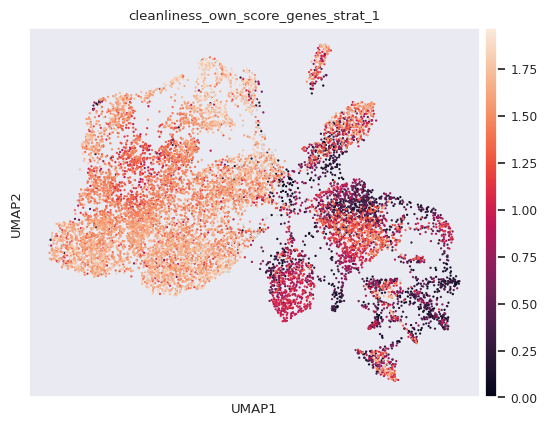

In [ ]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes_strat_1'])

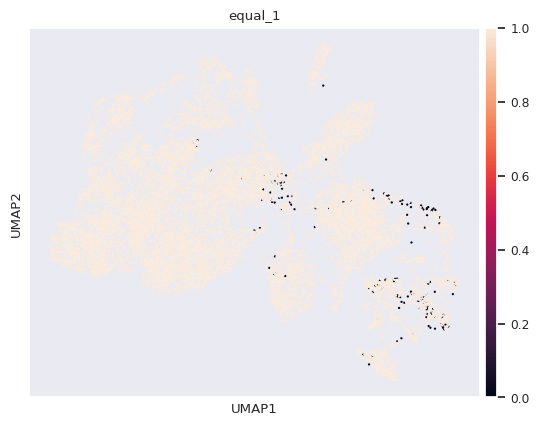

In [ ]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_1'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_1'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_1'])

Hepa         10
LSEC         10
Endo vein     9
Chol          6
Kupf         16
Stel         14
Fibr         19
B cell        3
Meso          5
Oth im        4
dtype: int64


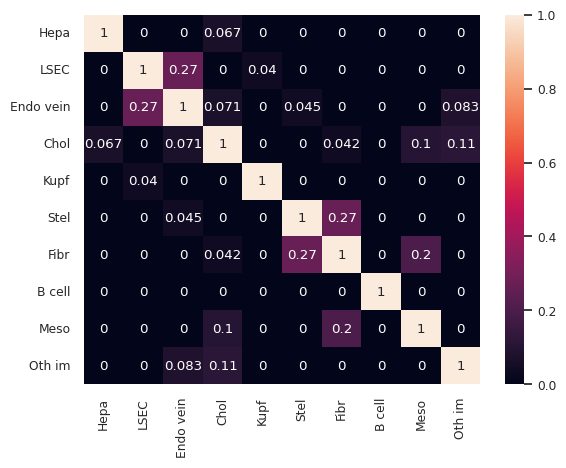

In [ ]:
Jaccard_similarity_matrix(path_mg_mod1)

Adamtsl2
Is marker gene of: ['Stel', 'Fibr']
Could also be a marker gene of: ['Meso']
Axl
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['Fibr']
Cd36
Is marker gene of: ['LSEC']
Could also be a marker gene of: ['Endo vein']
Col1a1
Is marker gene of: ['Fibr']
Could also be a marker gene of: ['Meso']
Igfbp3
Is marker gene of: ['Stel']
Could also be a marker gene of: ['Fibr']
Lpl
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['Fibr']
Ngfr
Is marker gene of: ['Stel']
Could also be a marker gene of: ['LSEC']
Spon2
Is marker gene of: ['Stel']
Could also be a marker gene of: ['Fibr', 'Meso']
Summary:
Meso
Maybe add:['Adamtsl2', 'Col1a1', 'Spon2']
Fibr
Maybe add:['Axl', 'Igfbp3', 'Lpl', 'Spon2']
Endo vein
Maybe add:['Cd36']
LSEC
Maybe add:['Ngfr']
Adamtsl2
Is marker gene of: ['Stel', 'Fibr']
Could also be a marker gene of: ['Meso']
Axl
Is marker gene of: ['Kupf']
Could also be a marker gene of: ['Fibr']
Cd36
Is marker gene of: ['LSEC']
Could also be a marker gene of

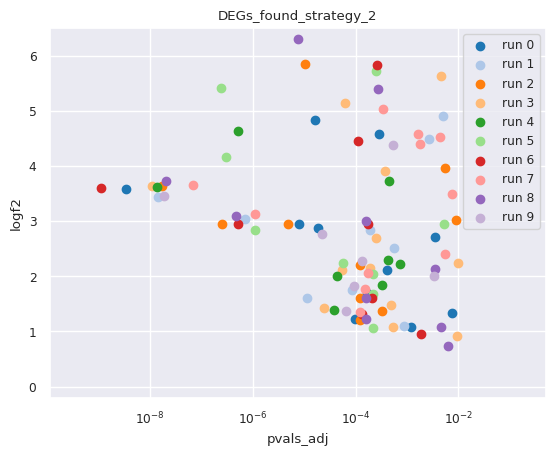

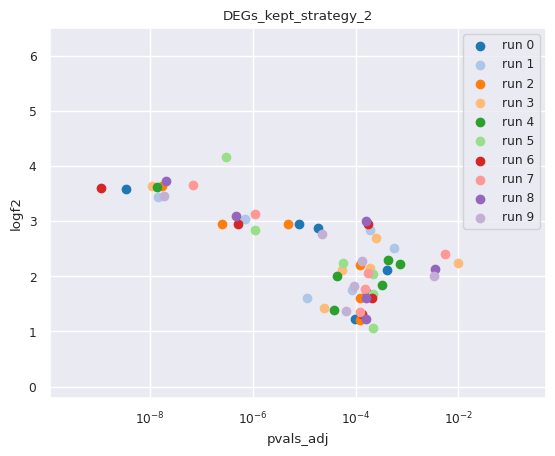

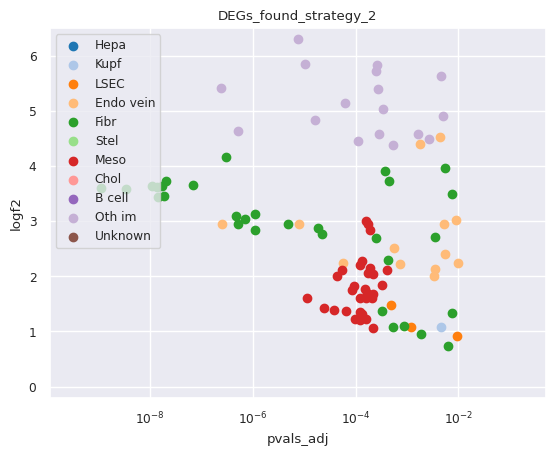

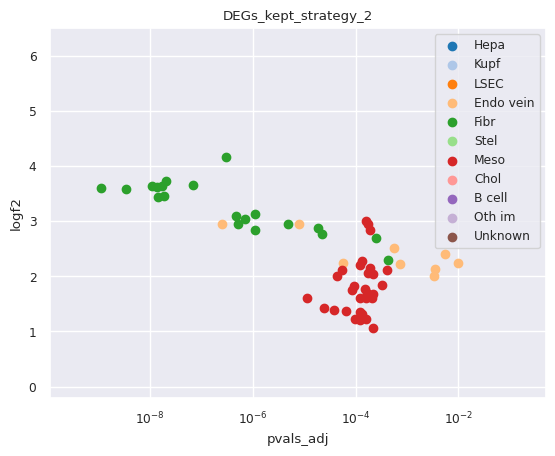

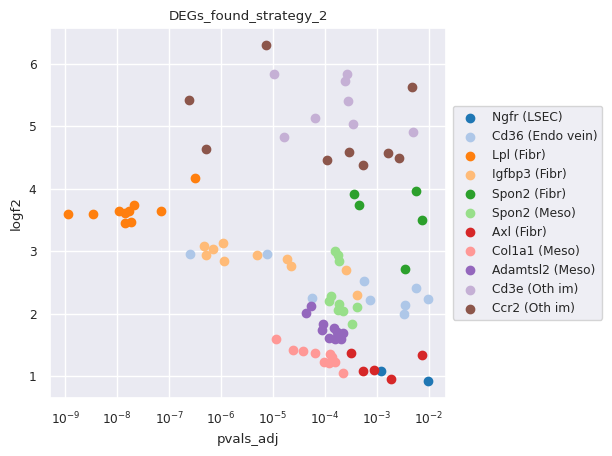

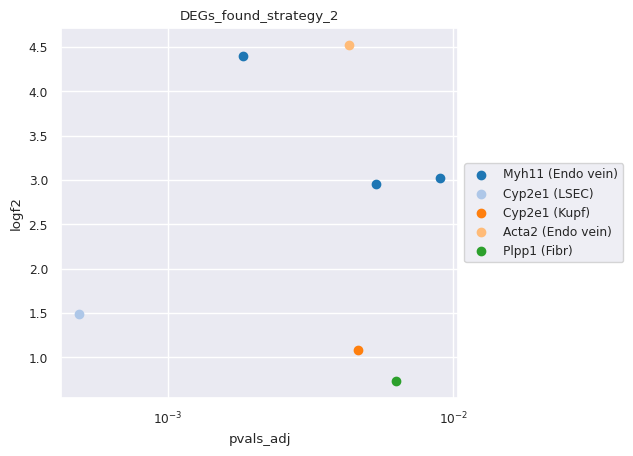

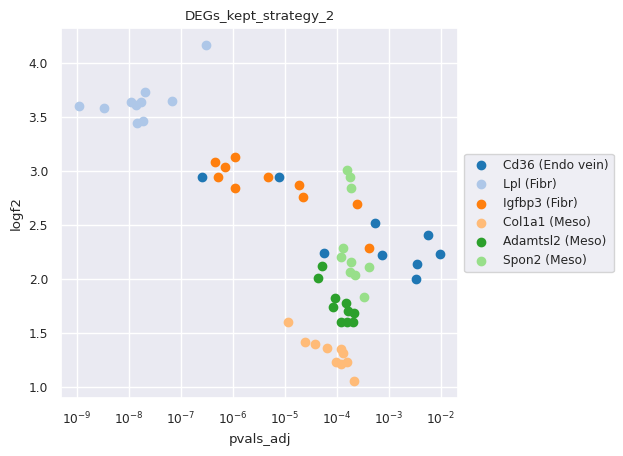

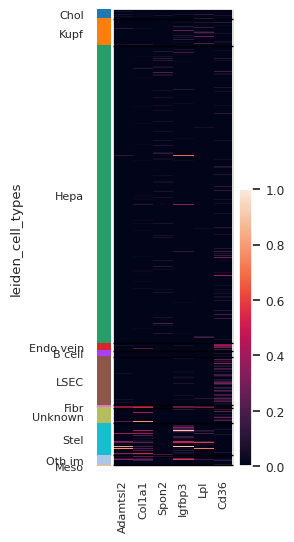

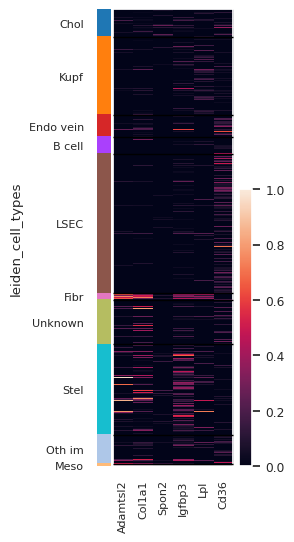

In [ ]:
# STRATEGY 2 to change the marker gene list
results_strat2_10, results_runs2_10, DEG_details_runs2_10 = Apply_strategy_multiple_times(sdata.table,cell_types,leiden_clusters_per_ct,path_mg,10,min_cells_per_leiden_cell_type,2)

In [ ]:
# Update marker gene list based on STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 1
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_othIm_modified2.csv")

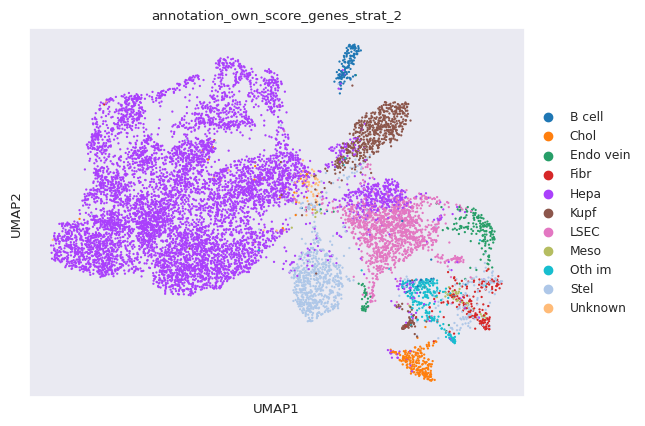

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_2
B cell                               1.522978
Chol                                 2.146420
Endo vein                            1.710011
Fibr                                 1.620948
Hepa                                65.888849
Kupf                                 5.744567
LSEC                                11.204133
Meso                                 0.445315
Oth im                               2.048450
Stel                                 7.142857
Unknown                              0.525472


In [ ]:
# Own score genes with modified marker gene list based on STRATREGY 2
path_mg_mod2 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_othIm_modified2.csv"
scores = own_score_genes(sdata.table,path_mg_mod2,suffix='_strat_2')
visualize_classification(sdata,'annotation_own_score_genes_strat_2','umap_23_15',path_mg_mod2,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

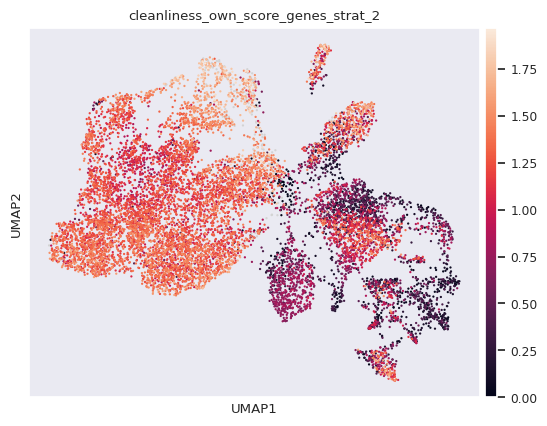

In [ ]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes_strat_2'])
# makes sense that this becomes worse, because more marker genes overlap between cell types
# but does not mean that the annotation is worse

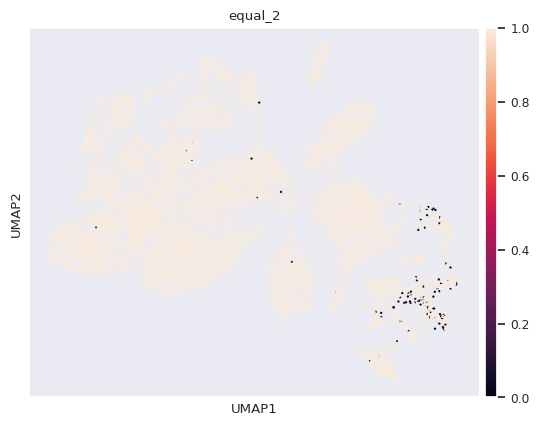

In [ ]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_2'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_2'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_2'])

Hepa         10
LSEC         11
Endo vein    10
Chol          7
Kupf         16
Stel         16
Fibr         23
B cell        4
Meso          8
Oth im        4
dtype: int64


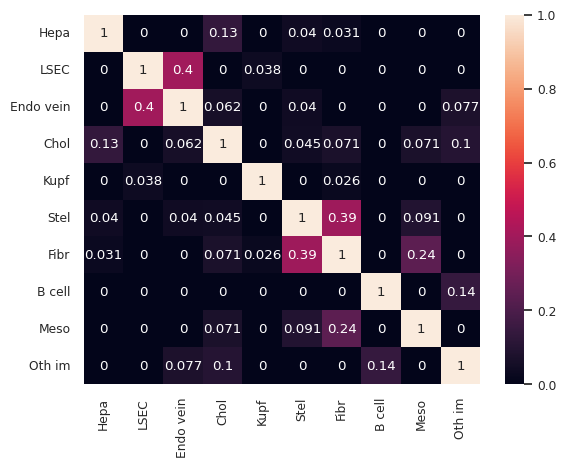

In [ ]:
Jaccard_similarity_matrix(path_mg_mod2)

In [ ]:
# STRATEGY 1 and STRATEGY 2 combined to change the marker gene list

In [ ]:
# Update marker gene list based on STRATEGY 1 and STRATEGY 2:
df_mg = pd.read_csv(path_mg,index_col=0)
keys = results_strat1_10.keys()
for key in keys:
    f = [x[0] for x in results_strat1_10[key]]
    f = np.unique(f).tolist()
    df_mg.loc[f,key] = 0
keys = results_strat2_10.keys()
for key in keys:
    df_mg.loc[results_strat2_10[key],key] = 1
df_mg.to_csv("/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_othIm_modified_1_2.csv")

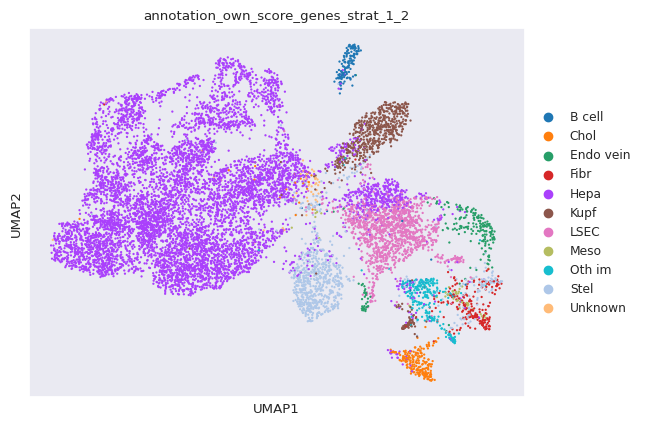

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes_strat_1_2
B cell                                 1.425009
Chol                                   2.101888
Endo vein                              1.870324
Fibr                                   1.879230
Hepa                                  66.084788
Kupf                                   5.735661
LSEC                                  10.936943
Meso                                   0.489847
Oth im                                 2.217670
Stel                                   6.893481
Unknown                                0.365159


In [ ]:
# Own score genes with modified marker gene list based on STRATREGY 1 and STRATEGY 2
path_mg_mod_1_2 = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic_othIm_modified_1_2.csv"
scores = own_score_genes(sdata.table,path_mg_mod_1_2,suffix='_strat_1_2')
visualize_classification(sdata,'annotation_own_score_genes_strat_1_2','umap_23_15',path_mg_mod_1_2,plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

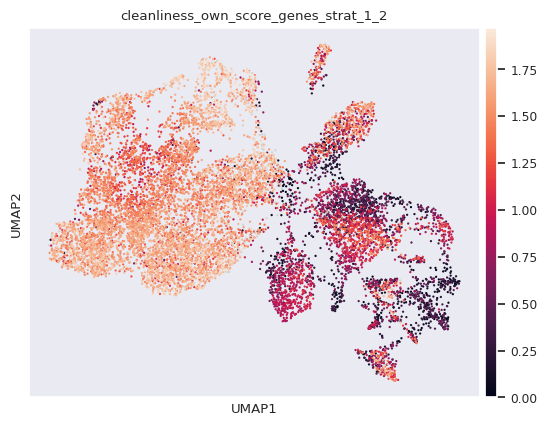

In [ ]:
sc.pl.umap(sdata.table,color=['cleanliness_own_score_genes_strat_1_2'])

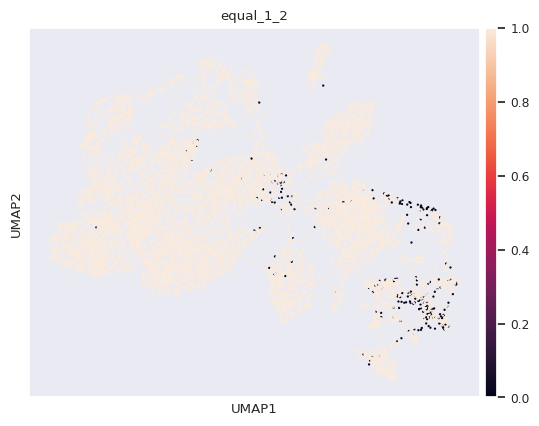

In [ ]:
l = [sdata.table.obs['annotation_own_score_genes'].to_list()[i] == sdata.table.obs['annotation_own_score_genes_strat_1_2'].to_list()[i] for i in range(len(sdata.table.obs['annotation_own_score_genes'].to_list()))]
# list with True False to 0 1
sdata.table.obs['equal_1_2'] = [int(i) for i in l]
sc.pl.umap(sdata.table,color=['equal_1_2'])

Hepa         10
LSEC         10
Endo vein    10
Chol          6
Kupf         16
Stel         14
Fibr         21
B cell        3
Meso          8
Oth im        4
dtype: int64


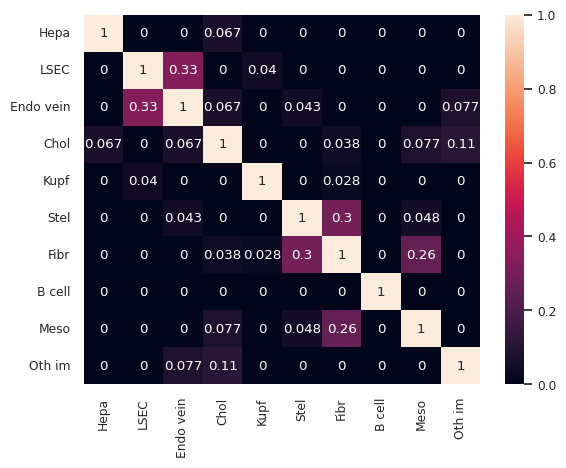

In [ ]:
Jaccard_similarity_matrix(path_mg_mod_1_2)